In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [64]:
# dfs = [pd.read_csv('warm_start_comparison_0_7.csv'),
#        pd.read_csv('warm_start_comparison.csv')]
# df = pd.concat(dfs)
# df.to_csv('warm_start_comparison_06_21_22.csv', index=False)

In [76]:
run_str = '06_21_22_gmic_cold_tight_tol_warm'

In [77]:
df = pd.read_csv(f'warm_start_comparison_{run_str}.csv')

In [78]:
df['warm failed cglp ratio'] = df['failed cglps']/df['warm evaluated nodes']
df['warm null cglp ratio'] = df['null cglps']/df['warm evaluated nodes']
df['warm run cglp ratio'] = df['run cglps']/df['warm evaluated nodes']

In [79]:
if 'stopped on time' not in df.columns:
    df['stopped on time'] = False
    
if 'cut generation time' not in df.columns:
    df['cut generation time'] = 0

In [80]:
df['restart solve time no warm cuts ratio'] = \
    (df['cold solve time'] - df['total restart solve time'] + df['cut generation time']) / \
    df['cold solve time']

In [81]:
df

,test number,cut off,cglp_constraints,cglp_bounds,gomory_cuts,initial gap improvement ratio,cut off gap improvement ratio,warm evaluated nodes ratio,total restart evaluated nodes ratio,warm solve time ratio,total restart solve time ratio,cold objective value,cold initial dual bound,cold initial gap,cold cut off dual bound,cold cut off gap,warm objective value,warm initial dual bound,warm initial gap,warm cut off dual bound,warm cut off gap,cold evaluated nodes,warm evaluated nodes,total restart evaluated nodes,cold solve time,cut off time,cglp init time,warm solve time,total restart solve time,cut generation time,failed cglps,null cglps,run cglps,solution gaps overlap,stopped on time,warm failed cglp ratio,warm null cglp ratio,warm run cglp ratio,restart solve time no warm cuts ratio
0,0,4,cumulative,cumulative,False,0.025089,0.135205,0.096386,0.072289,-11.698359,-12.012098,-1148.0,-1188.365844,0.035162,-1188.289807,0.035096,-1148.000000,-1187.353091,0.034280,-1182.842439,0.030351,166,150,154,0.262431,0.014697,0.067638,3.332443,3.414778,0.706816,0,0,210,True,NaN,0.0,0.0,1.400000,-9.318758
1,0,4,cumulative,fixed,False,0.025089,0.135205,0.024096,0.000000,-33.944195,-34.257934,-1148.0,-1188.365844,0.035162,-1188.289807,0.035096,-1148.000000,-1187.353091,0.034280,-1182.842439,0.030351,166,162,166,0.262431,0.014697,0.067638,9.170440,9.252775,0.894649,0,0,128,True,NaN,0.0,0.0,0.790123,-30.848852
2,0,4,fixed,cumulative,False,0.025089,0.135205,0.084337,0.060241,-11.264405,-11.578144,-1148.0,-1188.365844,0.035162,-1188.289807,0.035096,-1148.000000,-1187.353091,0.034280,-1182.842439,0.030351,166,152,156,0.262431,0.014697,0.067638,3.218560,3.300895,0.635001,0,0,186,True,NaN,0.0,0.0,1.223684,-9.158457
3,0,4,fixed,fixed,False,0.025089,0.135205,-0.120482,-0.144578,-3.771990,-4.085729,-1148.0,-1188.365844,0.035162,-1188.289807,0.035096,-1148.000000,-1187.353091,0.034280,-1182.842439,0.030351,166,186,190,0.262431,0.014697,0.067638,1.252318,1.334653,0.943188,0,0,175,True,NaN,0.0,0.0,0.940860,-0.491687
4,0,8,cumulative,cumulative,False,0.197958,0.231567,0.325301,0.277108,-45.057950,-45.703167,-1148.0,-1188.365844,0.035162,-1182.720000,0.030244,-1148.006084,-1180.381366,0.028201,-1174.686207,0.023240,166,112,120,0.264657,0.020971,0.149790,12.189559,12.360320,2.220530,0,0,323,True,NaN,0.0,0.0,2.883929,-37.312948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,49,16,fixed,fixed,False,0.118621,0.092453,0.261426,0.232176,-5.584196,-6.172191,-186.0,-207.698652,0.116659,-204.522973,0.099586,-186.000000,-205.124744,0.102821,-202.810466,0.090379,547,404,420,0.641143,0.050179,0.326810,4.221411,4.598400,3.671495,0,0,281,True,False,0.0,0.0,0.695545,-0.445707
684,49,32,cumulative,cumulative,False,0.000000,0.084454,-0.009141,-0.067642,-12.465984,-13.859567,-186.0,-207.698652,0.116659,-202.283792,0.087547,-186.000000,-207.698652,0.116659,-200.908560,0.080154,547,552,584,0.639857,0.070226,0.821468,8.616304,9.507998,1.268044,0,0,418,True,False,0.0,0.0,0.757246,-11.877806
685,49,32,cumulative,fixed,False,0.127658,0.091735,-0.129799,-0.188300,-552.340521,-553.734105,-186.0,-207.698652,0.116659,-202.283792,0.087547,-186.000000,-204.928647,0.101767,-200.789997,0.079516,547,618,650,0.639857,0.070226,0.821468,354.058806,354.950500,10.782251,0,0,449,True,False,0.0,0.0,0.726537,-536.883072
686,49,32,fixed,cumulative,False,0.127658,0.121061,0.137112,0.078611,-12.090383,-13.483966,-186.0,-207.698652,0.116659,-202.283792,0.087547,-186.000000,-204.928647,0.101767,-200.312453,0.076949,547,472,504,0.639857,0.070226,0.821468,8.375973,9.267667,1.169136,0,0,359,True,False,0.0,0.0,0.760593,-11.656783


In [90]:
# shouldn't need to run - refactor to just filter for df["solution gaps overlap"] == True
df = df[~pd.isna(df['stopped on time'])]
df = df[df['stopped on time'] == False]
df = df[df['solution gaps overlap']]

In [91]:
df

,test number,cut off,cglp_constraints,cglp_bounds,gomory_cuts,initial gap improvement ratio,cut off gap improvement ratio,warm evaluated nodes ratio,total restart evaluated nodes ratio,warm solve time ratio,total restart solve time ratio,cold objective value,cold initial dual bound,cold initial gap,cold cut off dual bound,cold cut off gap,warm objective value,warm initial dual bound,warm initial gap,warm cut off dual bound,warm cut off gap,cold evaluated nodes,warm evaluated nodes,total restart evaluated nodes,cold solve time,cut off time,cglp init time,warm solve time,total restart solve time,cut generation time,failed cglps,null cglps,run cglps,solution gaps overlap,stopped on time,warm failed cglp ratio,warm null cglp ratio,warm run cglp ratio,restart solve time no warm cuts ratio
104,8,4,cumulative,cumulative,False,0.279522,0.261841,0.020408,-0.061224,-17.264173,-18.290260,-26.0,-30.064135,0.156313,-29.666667,0.141026,-26.0,-28.928119,0.112620,-28.706582,0.104099,49,48,52,0.084600,0.013971,0.072836,1.545149,1.631956,0.398824,0,0,97,True,False,0.0,0.0,2.020833,-13.576028
105,8,4,cumulative,fixed,False,0.285045,0.264298,0.142857,0.061224,-26.982884,-28.008972,-26.0,-30.064135,0.156313,-29.666667,0.141026,-26.0,-28.905674,0.111757,-28.697573,0.103753,49,42,46,0.084600,0.013971,0.072836,2.367352,2.454159,0.499361,0,0,103,True,False,0.0,0.0,2.452381,-22.106359
106,8,4,fixed,cumulative,False,0.285045,0.240695,0.142857,0.061224,-16.723759,-17.749846,-26.0,-30.064135,0.156313,-29.666667,0.141026,-26.0,-28.905674,0.111757,-28.784120,0.107082,49,42,46,0.084600,0.013971,0.072836,1.499430,1.586237,0.372849,0,0,84,True,False,0.0,0.0,2.000000,-13.342648
107,8,4,fixed,fixed,False,0.285045,0.240695,0.142857,0.061224,-5.447967,-6.474054,-26.0,-30.064135,0.156313,-29.666667,0.141026,-26.0,-28.905674,0.111757,-28.784120,0.107082,49,42,46,0.084600,0.013971,0.072836,0.545498,0.632305,0.421365,0,0,83,True,False,0.0,0.0,1.976190,-1.493381
108,8,8,cumulative,cumulative,False,0.337258,0.363200,0.061224,-0.102041,-25.012650,-26.697826,-26.0,-30.064135,0.156313,-28.886256,0.111010,-26.0,-28.693474,0.103595,-27.837967,0.070691,49,46,54,0.088694,0.022217,0.127248,2.307166,2.456631,0.572463,0,0,112,True,False,0.0,0.0,2.434783,-20.243466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,49,16,fixed,fixed,False,0.118621,0.092453,0.261426,0.232176,-5.584196,-6.172191,-186.0,-207.698652,0.116659,-204.522973,0.099586,-186.0,-205.124744,0.102821,-202.810466,0.090379,547,404,420,0.641143,0.050179,0.326810,4.221411,4.598400,3.671495,0,0,281,True,False,0.0,0.0,0.695545,-0.445707
684,49,32,cumulative,cumulative,False,0.000000,0.084454,-0.009141,-0.067642,-12.465984,-13.859567,-186.0,-207.698652,0.116659,-202.283792,0.087547,-186.0,-207.698652,0.116659,-200.908560,0.080154,547,552,584,0.639857,0.070226,0.821468,8.616304,9.507998,1.268044,0,0,418,True,False,0.0,0.0,0.757246,-11.877806
685,49,32,cumulative,fixed,False,0.127658,0.091735,-0.129799,-0.188300,-552.340521,-553.734105,-186.0,-207.698652,0.116659,-202.283792,0.087547,-186.0,-204.928647,0.101767,-200.789997,0.079516,547,618,650,0.639857,0.070226,0.821468,354.058806,354.950500,10.782251,0,0,449,True,False,0.0,0.0,0.726537,-536.883072
686,49,32,fixed,cumulative,False,0.127658,0.121061,0.137112,0.078611,-12.090383,-13.483966,-186.0,-207.698652,0.116659,-202.283792,0.087547,-186.0,-204.928647,0.101767,-200.312453,0.076949,547,472,504,0.639857,0.070226,0.821468,8.375973,9.267667,1.169136,0,0,359,True,False,0.0,0.0,0.760593,-11.656783


In [92]:
cut_offs = list(df['cut off'].unique())
tests = len(df['test number'].unique())
cglp_parameters = [{'cglp_constraints': 'cumulative', 'cglp_bounds': 'cumulative'},
                   {'cglp_constraints': 'cumulative', 'cglp_bounds': 'fixed'},
                   {'cglp_constraints': 'fixed', 'cglp_bounds': 'cumulative'},
                   {'cglp_constraints': 'fixed', 'cglp_bounds': 'fixed'}]

title = {
    'initial gap improvement ratio': 'Warm Start Initial Gap Relative Improvement',
    'cut off gap improvement ratio': 'Warm Start Cut Off Gap Relative Improvement',
    'warm evaluated nodes ratio': 'Warm Start Evaluated Nodes Relative Improvement',
    'total restart evaluated nodes ratio': 'Total Restart Evaluated Nodes Relative Improvement',
    'warm solve time ratio': 'Warm Start Run Time Relative Improvement',
    'total restart solve time ratio': 'Total Restart Run Time Relative Improvement',
    'restart solve time no warm cuts ratio': 'Total Restart Run Time Relative Improvement without Cut Generation',
    'warm null cglp ratio': 'Ratio of Warm Start Nodes Not Selecting Own CGLP Cut'
}

/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_69748/2646293355.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


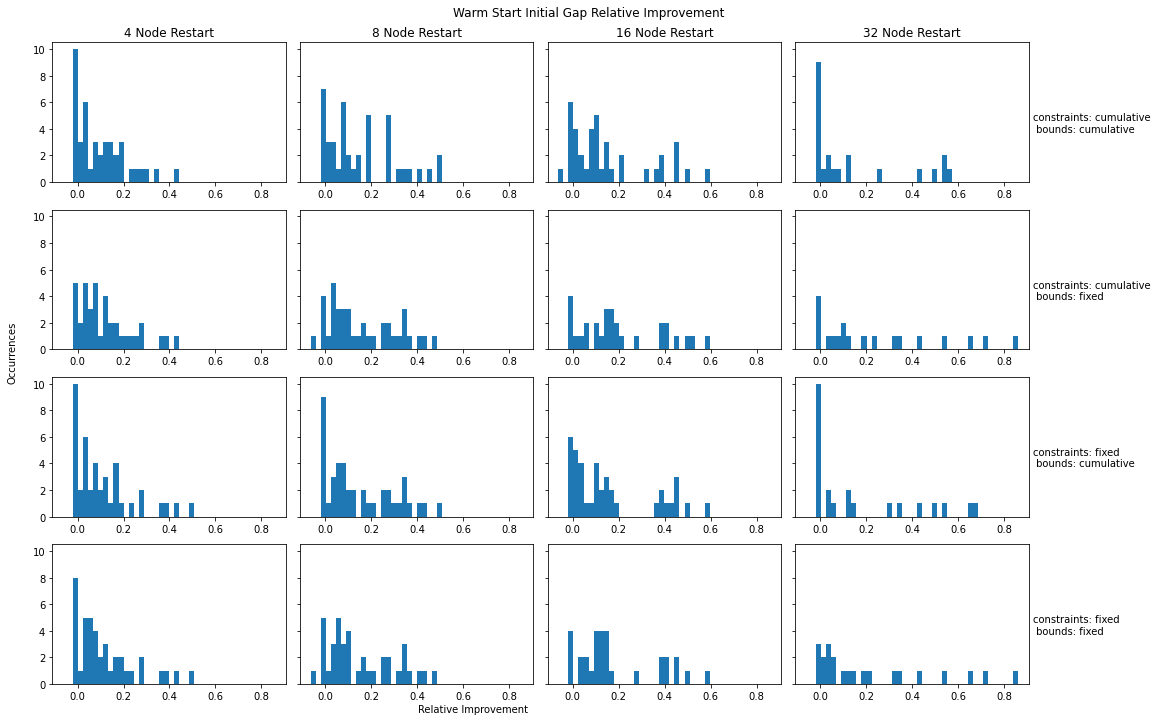

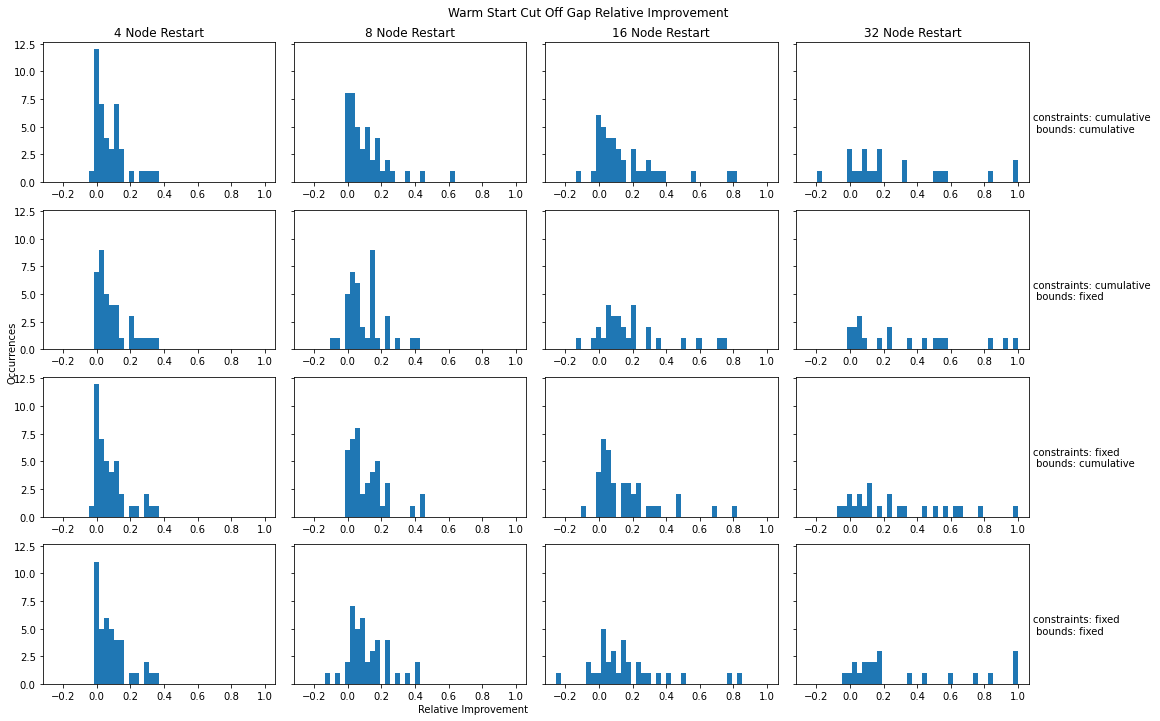

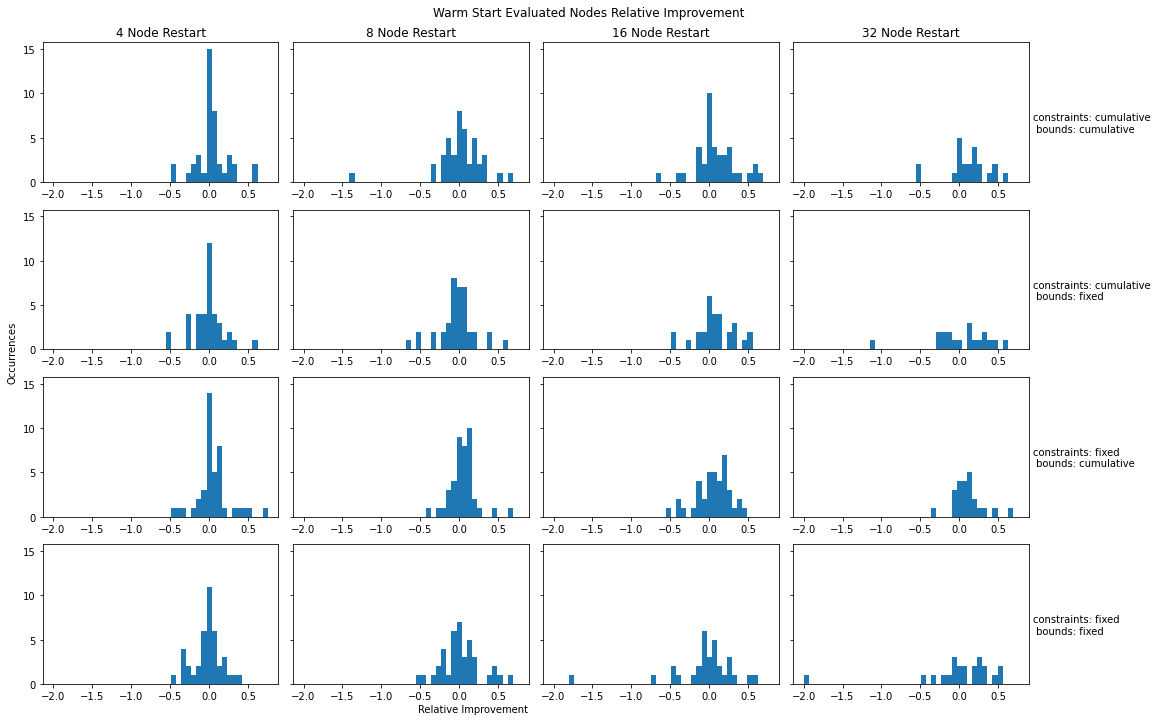

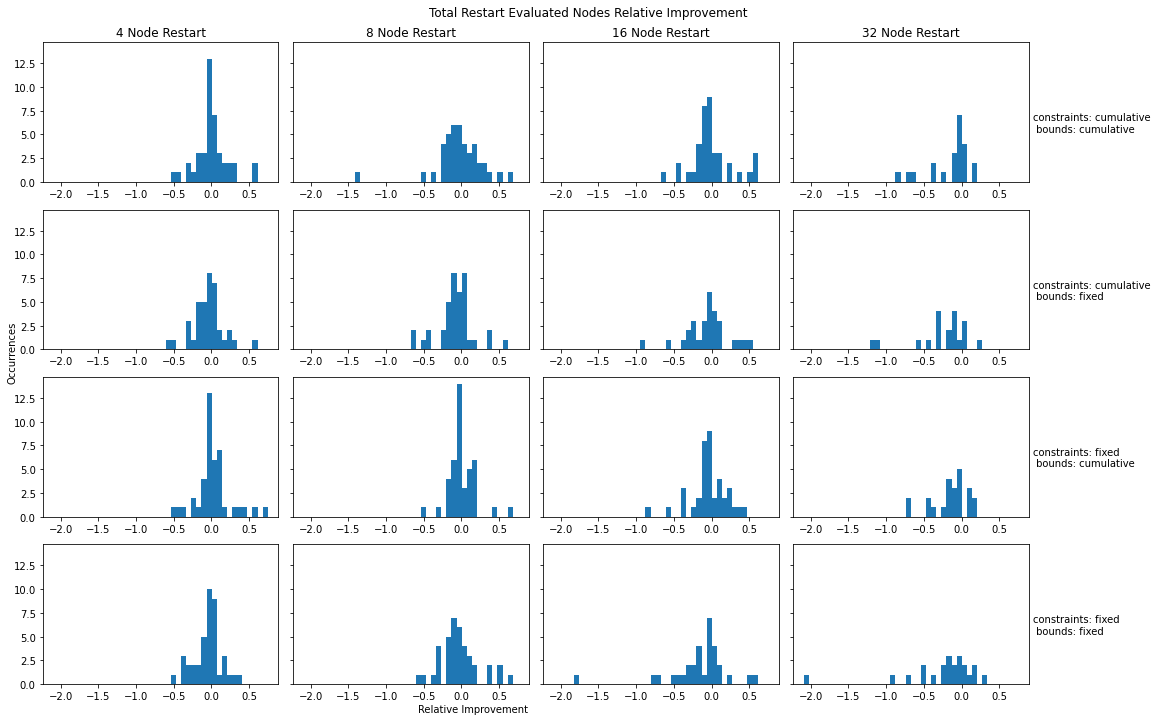

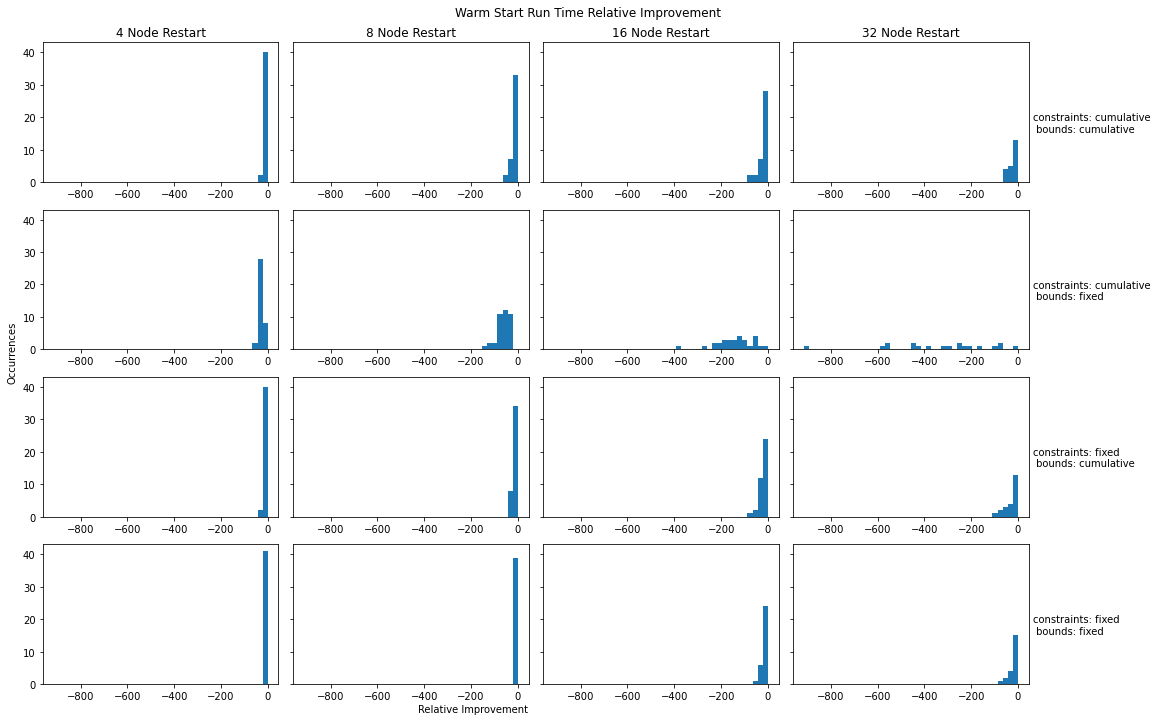

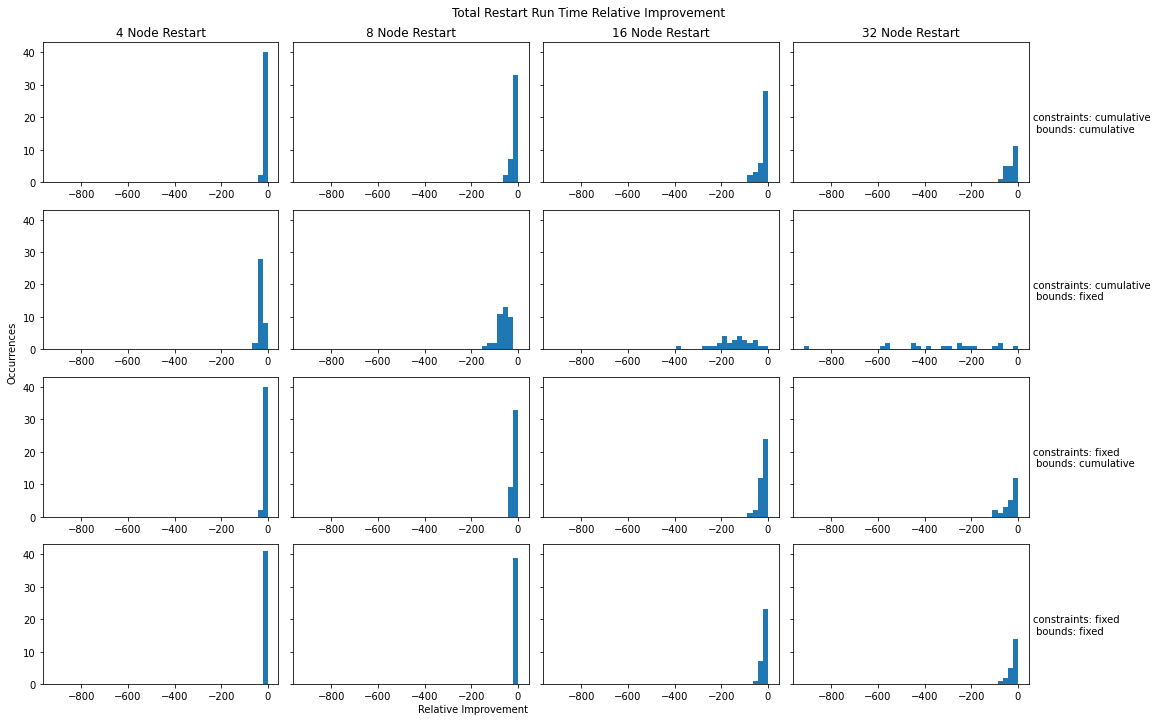

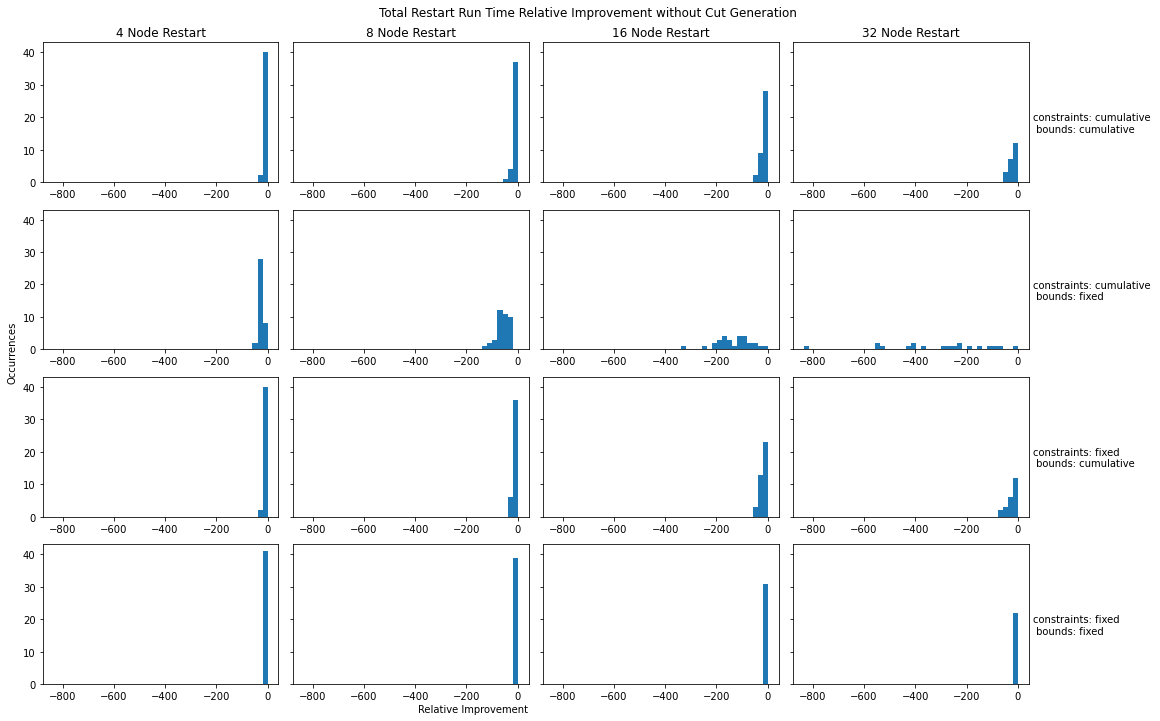

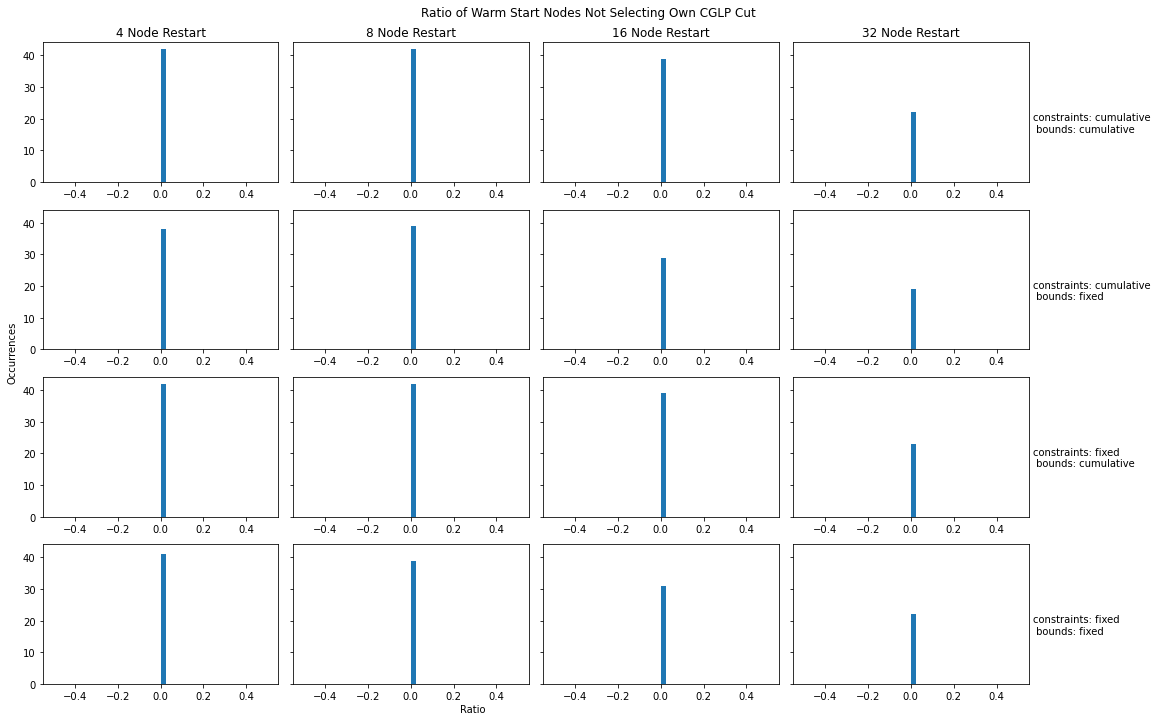

In [93]:
for metric, name in title.items():
    # make a new side by side plot for each metric
    fig, ax = plt.subplots(nrows=len(cglp_parameters), ncols=len(cut_offs), sharey=True,
                          figsize=(16, 10))
    low, high =  df[metric].min(), df[metric].max()
    for j, cut_off in enumerate(cut_offs):
        for i, p in enumerate(cglp_parameters):
            # make plot
            samples = df.loc[(df['cut off'] == cut_off) &
                             (df['cglp_constraints'] == p['cglp_constraints']) &
                             (df['cglp_bounds'] == p['cglp_bounds'])][metric]
            ax[i, j].hist(samples, bins=tests, range=(low, high))
            if j == 3:
                ax[i, j].set_ylabel(f'constraints: {p["cglp_constraints"]} \n bounds: {p["cglp_bounds"]} \n',
                                   ha='left', rotation='horizontal', va='center')
                ax[i, j].yaxis.set_label_position("right")

            # make it pretty
            if i == 0:
                ax[i, j].set_title(f"{cut_off} Node Restart")
    fig.suptitle(name)
    fig.tight_layout()
    if metric != 'warm null cglp ratio':
        fig.text(0.4, 0, 'Relative Improvement', ha='center')
    else:
        fig.text(0.4, 0, 'Ratio', ha='center')
    fig.text(0, 0.46, 'Occurrences', ha='center', rotation='vertical')
    fig.show()
    fig.savefig(f'{name}.png')

/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_3031/4039499262.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


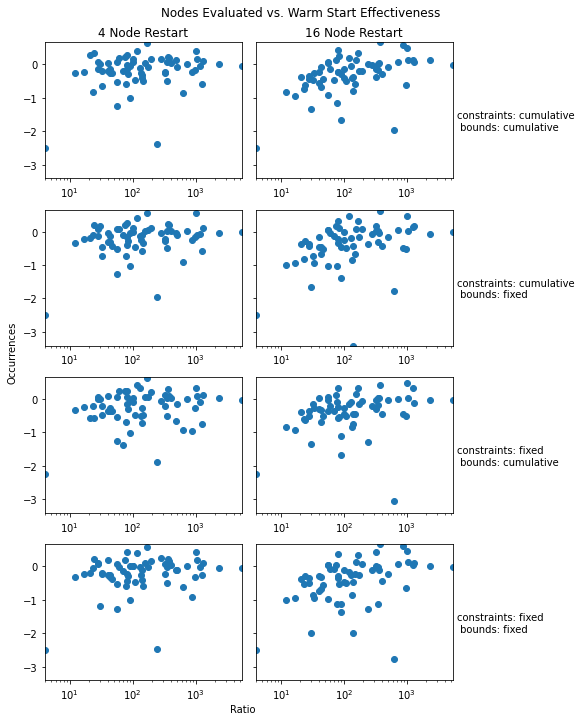

In [14]:
name = 'Nodes Evaluated vs. Warm Start Effectiveness'
x_col = 'cold evaluated nodes'
y_col = 'total restart evaluated nodes ratio'

fig, ax = plt.subplots(nrows=len(cglp_parameters), ncols=len(cut_offs), sharey=True,
                      figsize=(8, 10))
x_low = df['cold evaluated nodes'].min()
x_high = df['cold evaluated nodes'].max()
y_low = df['total restart evaluated nodes ratio'].min()
y_high = df['total restart evaluated nodes ratio'].max()

for j, cut_off in enumerate(cut_offs):
    for i, p in enumerate(cglp_parameters):
        # make plot
        samples = df.loc[(df['cut off'] == cut_off) &
                         (df['cglp_constraints'] == p['cglp_constraints']) &
                         (df['cglp_bounds'] == p['cglp_bounds'])][[x_col, y_col]]
        ax[i, j].scatter(samples[x_col], samples[y_col])
        ax[i, j].axis(xmin=x_low, xmax=x_high, ymin=y_low, ymax=y_high)
        ax[i, j].set_xscale('log')
        if j == 1:
            ax[i, j].set_ylabel(f'constraints: {p["cglp_constraints"]} \n bounds: {p["cglp_bounds"]} \n',
                               ha='left', rotation='horizontal', va='center')
            ax[i, j].yaxis.set_label_position("right")

        # make it pretty
        if i == 0:
            ax[i, j].set_title(f"{cut_off} Node Restart")
fig.suptitle(name)
fig.tight_layout()
if metric != 'warm null cglp ratio':
    fig.text(0.4, 0, 'Relative Improvement', ha='center')
else:
    fig.text(0.4, 0, 'Ratio', ha='center')
fig.text(0, 0.46, 'Occurrences', ha='center', rotation='vertical')
fig.show()
fig.savefig(f'{name}.png')

## Scratch

In [ ]:
for metric, name in title.items():
    # make a new side by side plot for each metric
    fig, ax = plt.subplots(nrows=1, ncols=len(cut_offs), sharey=True)
    low, high =  df[metric].min(), df[metric].max()
    for i, cut_off in enumerate(cut_offs):
        # make plot
        samples = df.loc[df['cut off'] == cut_off][metric]
        ax[i].hist(samples, bins=tests, range=(low, high))

        # make it pretty
        ax[i].set_title(f"{cut_off} Node Restart")
        if i == 0:
            ax[i].set_ylabel('Occurrences')
    fig.suptitle(name)
    fig.text(0.5, 0.04, 'Relative Improvement', ha='center')
    fig.show()